In [1]:
import numpy as np
import scipy.stats as sps
import math
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.datasets import load_iris
data = load_iris()

Рассмотрим модель смеси гауссовских распределений для Ирисов Фишера

$p(x) = \sum\limits_{k=1}^K p_k(x)\mathbb{P}(T=k)$,

где $T -$ номер компоненты смеси, $p_k(x) -$ плотсноть гауссовского распределения. 

Оценим параметры каждого из распределений, рассмотрев оценки $a = \overline X$, $cov(X^i, X^j) = \overline{X^i X^j} - \overline{X^i}\cdot \overline{X^j}$ для каждой компоненты смеси.

In [78]:
a = np.array([data["data"][50 * i : 50 * (i + 1)].mean(axis=0) for i in range(3)])
cov_matrix = np.array([[[(data["data"][50 * k:50 * (k + 1), i] * data["data"][50 * k:50 * (k + 1), j]).mean() 
                         - data["data"][50 * k:50 * (k + 1), i].mean() * data["data"][50 * k:50 * (k + 1), j].mean()
                          for i in range(4)] for j in range(4)] for k in range(3)])

Таким образом, получаем следующие оценки на параметры распределений:

In [97]:
for i in range(3):
    print "a" + str(i + 1), "=", a[i]
    print "Cov" + str(i + 1), "=\n" ,cov_matrix[i]

a1 = [ 5.006  3.418  1.464  0.244]
Cov1 =
[[ 0.121764  0.098292  0.015816  0.010336]
 [ 0.098292  0.142276  0.011448  0.011208]
 [ 0.015816  0.011448  0.029504  0.005584]
 [ 0.010336  0.011208  0.005584  0.011264]]
a2 = [ 5.936  2.77   4.26   1.326]
Cov2 =
[[ 0.261104  0.08348   0.17924   0.054664]
 [ 0.08348   0.0965    0.081     0.04038 ]
 [ 0.17924   0.081     0.2164    0.07164 ]
 [ 0.054664  0.04038   0.07164   0.038324]]
a3 = [ 6.588  2.974  5.552  2.026]
Cov3 =
[[ 0.396256  0.091888  0.297224  0.048112]
 [ 0.091888  0.101924  0.069952  0.046676]
 [ 0.297224  0.069952  0.298496  0.047848]
 [ 0.048112  0.046676  0.047848  0.073924]]


Вычислим для пар координат (0,1), (1, 3), (2,3) плотность каждой компоненты смеси, оценив параметры распределений по соответствующим проекциям.

In [364]:
def to_plot(comp, l, k):
    x = data["data"][50 * comp:50 * (comp + 1) , l]  # l координата 
    y = data["data"][50 * comp:50 * (comp + 1) , k]  # k координата
    x_min = x.min() - 0.1
    x_max = x.max() + 0.1
    y_min = y.min() - 0.1
    y_max = y.max() + 0.1
    
    grid = np.mgrid[x_min:x_max + 0.05:0.01, y_min:y_max + 0.05:0.01]
   
    density = np.array([[sps.multivariate_normal.pdf((grid[0, i, j], grid[1, i, j]), mean=a[comp][[l, k]],
                                                     cov=cov_matrix[comp][:, [l, k]][[l, k], :])
                           for j in range(grid[0].shape[1])]
                          for i in range(grid[0].shape[0])])

    plt.pcolormesh(grid[0], grid[1], density, cmap='BuPu')
    plt.scatter(x, y)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title('K = ' + str(comp + 1) + ' , components (' +  str(l) + ', ' + str(k) + ')' )
    
    CS = plt.contour(grid[0], grid[1], density, np.linspace(density.mean(), density.max(), 6))
    plt.clabel(CS, fontsize=14, inline=1, fmt='%1.3f', cmap='Set3')

Сравним полученные распределения с распределением данных об ирисах.

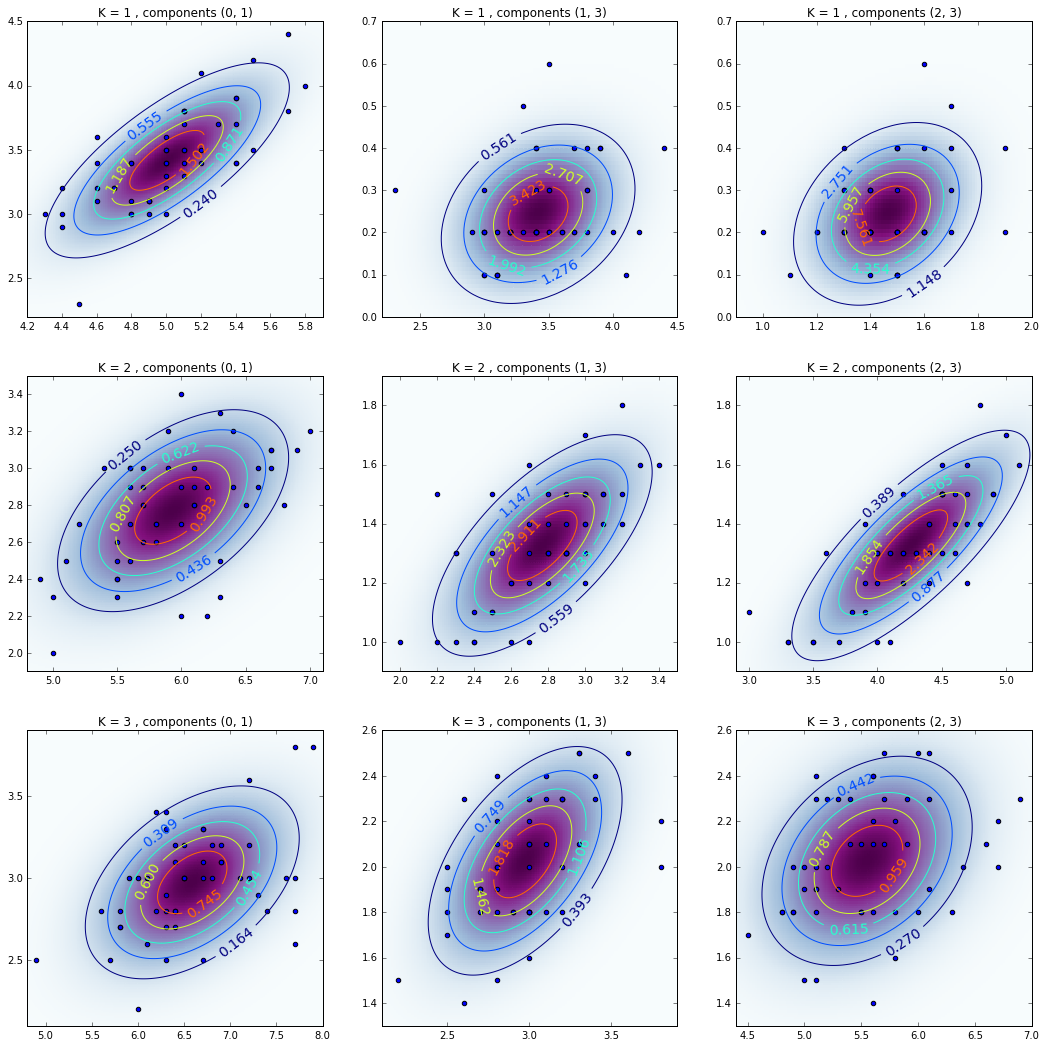

In [373]:
plt.figure(figsize=(18, 18))
crdnts = ((0, 1), (1, 3), (2, 3))
for K in range(3):
    for crd in range(3):
        subplot(3, 3, 3 * K + crd + 1)
        to_plot(K, crdnts[crd][0], crdnts[crd][1])

$P(T = k) = \frac{1}{3}$.